In [3]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd/ 

In [4]:
data = pd.read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
data = data.drop({'Fe'},axis = 1)
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,7


In [6]:
data[data.duplicated()].shape

(1, 9)

In [7]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,1


In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(213, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Type    213 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 16.6 KB


array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Type'}>]], dtype=object)

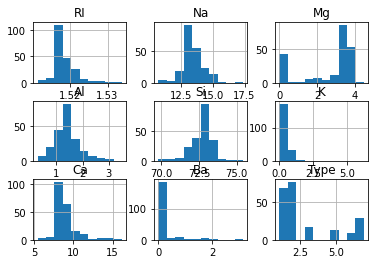

In [11]:
data.hist()

In [12]:
x = data.iloc[:,0:8]
y =data['RI']

In [13]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57


In [14]:
y

0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: RI, Length: 213, dtype: float64

In [15]:
colnames = list(data.columns)
colnames

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Type']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# KNN

In [18]:
num_folds = 10
kfold = KFold(n_splits=10)

In [19]:
model = KNeighborsRegressor(n_neighbors=17)

In [20]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=17)

In [21]:
model.score(x_test,y_test)

0.7118524069083462